# Decision Tree Algorithm

A decision tree algorithm is a type of supervised machine learning algorithm used for both classification and regression tasks. It uses a tree-like model of decisions and their possible consequences, including chance event outcomes, resource costs, and utility.

## Structure of a Decision Tree

1. **Root Node**: Represents the entire dataset, which is then split into two or more homogeneous sets.
2. **Internal Nodes**: Represent the features of the dataset and test the value of a specific attribute.
3. **Branches**: Represent the outcome of the test and connect to the next node (either another internal node or a leaf node).
4. **Leaf Nodes (Terminal Nodes)**: Represent the final output or decision (classification or regression result).

## How Decision Trees Work

1. **Splitting**: The dataset is split into subsets based on an attribute value test. The goal is to make each subset as pure as possible (i.e., as homogeneous as possible in terms of the target variable).
2. **Selection of Attribute**: The best attribute to split the data is selected using metrics such as:
   - **Gini Index**: Measures impurity or purity used in classification problems.
   - **Information Gain**: Measures the reduction in entropy (disorder) after the dataset is split.
   - **Chi-Square**: Used for categorical target variables to assess the statistical significance of the splits.
   - **Reduction in Variance**: Used in regression problems to minimize variance within the subsets.

3. **Stopping Criteria**: The growth of the tree stops when:
   - A node has all the same values for the target variable.
   - There are no more remaining attributes to split.
   - Further splitting does not improve the model significantly.

4. **Pruning**: Post-processing step to remove nodes that provide little to no additional power to predict target variables. It helps to reduce the complexity of the model and prevent overfitting.

## Advantages of Decision Trees

- **Easy to Understand and Interpret**: The model is intuitive and can be visualized.
- **No Need for Feature Scaling**: Works well with datasets that have a mix of feature types (binary, categorical, numerical).
- **Handles Non-linear Relationships**: Can capture complex relationships between features.


**Importing Important libraries**

In [79]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

### Loading and Exploring DataSet
This is a database of customers of an insurance company. Each data point represents record for one customer. The group represents the number of accidents the customer has been involved with in the past

* 0 - red: many accidents
* 1 - green: few or no accidents
* 2 - yellow: in the middle  

The used delimiter is ;


**Reading CSV File**

In [80]:
df = pd.read_csv('./insurance-customers-1500.csv', sep=';')
df.head()

,speed,age,miles,group
0,98.0,44.0,25.0,1
1,118.0,54.0,24.0,1
2,111.0,26.0,34.0,0
3,97.0,25.0,10.0,2
4,114.0,38.0,22.0,1


In [81]:
df.describe()

,speed,age,miles,group
count,1500.000000,1500.000000,1500.000000,1500.000000
mean,122.492667,44.980667,30.434000,0.998667
std,17.604333,17.130400,15.250815,0.816768
min,68.000000,16.000000,1.000000,0.000000
25%,108.000000,32.000000,18.000000,0.000000
50%,120.000000,42.000000,29.000000,1.000000
75%,137.000000,55.000000,42.000000,2.000000
max,166.000000,100.000000,84.000000,2.000000


There are some potential outliers in age columns and miles columns.

Let's see correlation graph.

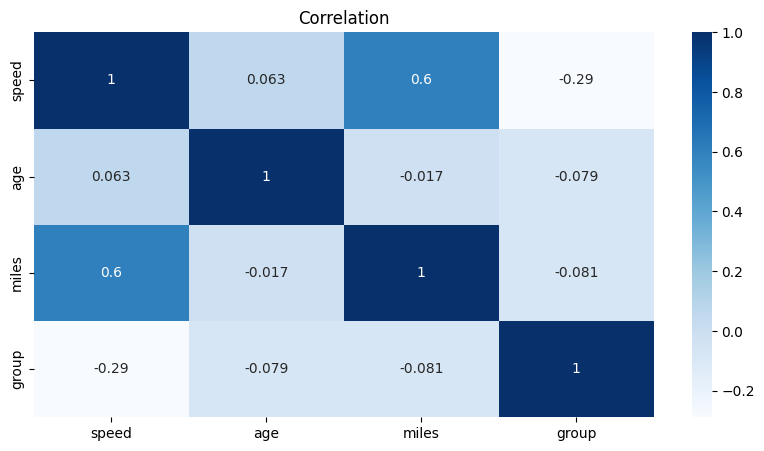

In [82]:
plt.figure(figsize=(10,5))
sns.heatmap(df.select_dtypes("number").corr(),annot=True,cmap="Blues")
plt.title("Correlation")
plt.show()

We can easily see that speed has high correlation with group column. There is very less relationship of group column with other remaining columns. We can omit those but let's keep them for now and see the result


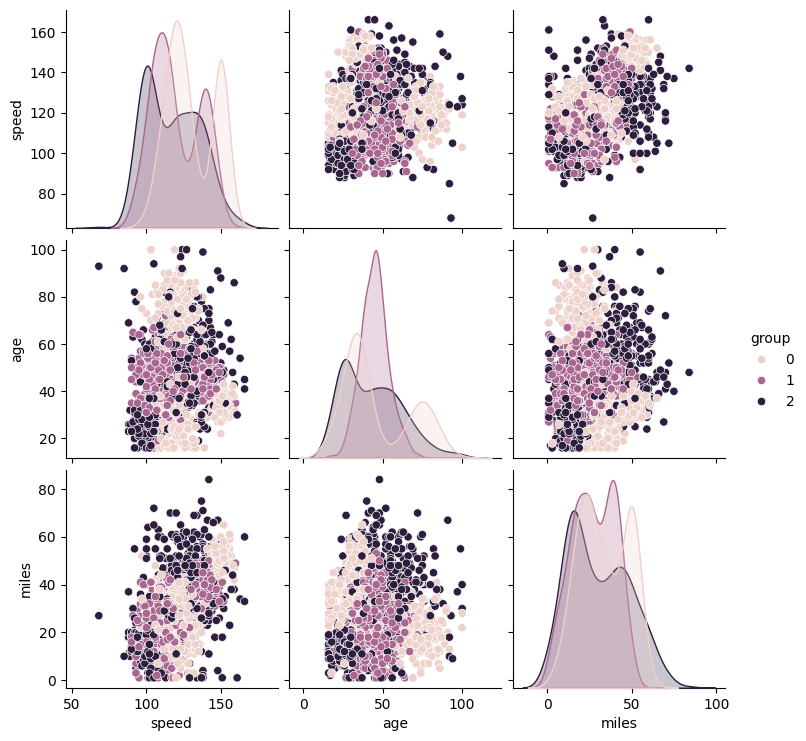

In [83]:
sns.pairplot(df,hue="group")

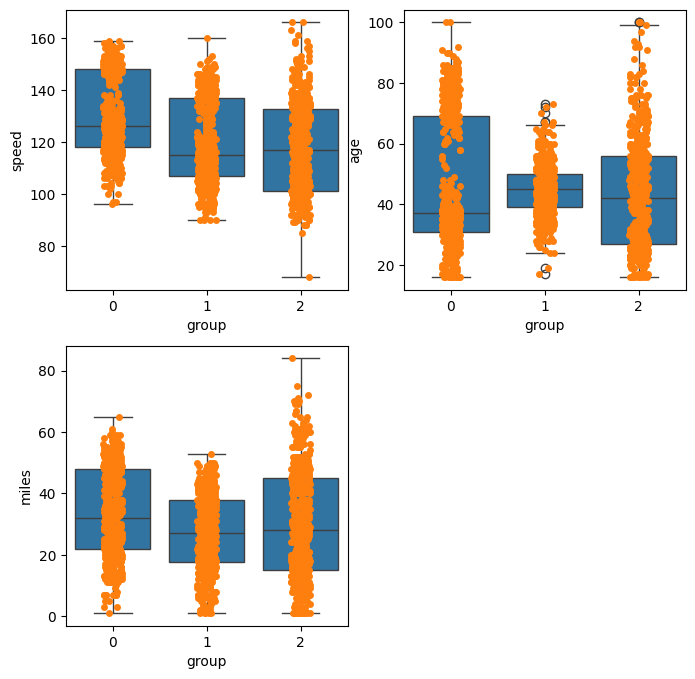

In [84]:
plt.figure(figsize=(8,8))
for i in range(3):
    plt.subplot(2,2,i+1)
    sns.boxplot(data=df,x="group",y=df.columns.to_list()[i])
    sns.stripplot(x="group", y=df.columns.to_list()[i], data=df, jitter=True, edgecolor="gray")
plt.show()

We can observe some outliers in the model.

#### Let's divide data into input features and target variable


In [85]:
df.dropna(inplace=True)
Y=df['group']  #target column
X= df.drop('group', axis='columns') #input features

### Model Building and Analysis

In [86]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
#for creating the confusion matrix for our model
from sklearn.metrics import confusion_matrix

In [87]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [88]:
model = DecisionTreeClassifier()


In [89]:
model.fit(X_train,y_train)

DecisionTreeClassifier()

In [90]:
#lets predict the model
y_pred = model.predict(X_test)
train_acc = model.score(X_train,y_train)
test_acc = model.score(X_test,y_test)

print(train_acc,test_acc)

0.9983333333333333 0.72


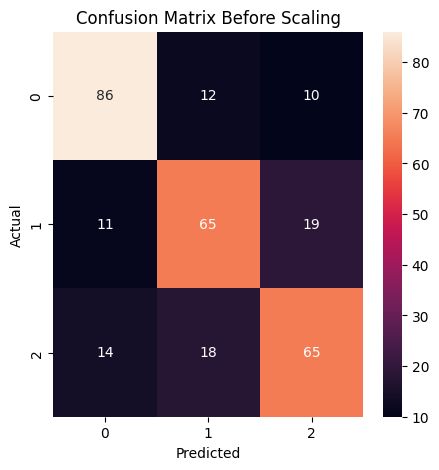

In [91]:
corr_before_scaling = confusion_matrix(y_true=y_test,y_pred=y_pred)
corr_before_scaling

#leats plot a confusion matrix
plt.figure(figsize=(5,5))
sns.heatmap(corr_before_scaling,annot=True)
plt.title("Confusion Matrix Before Scaling")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

Testing accuracy is not so nice so lets do some scaling in feature values and train model again and find accuracy

In [92]:
df = pd.read_csv('./insurance-customers-1500.csv', sep=';')
df.dropna(inplace=True)

#lets remove outliers also
df = df[df["age"]<85]
df = df[df["miles"]<76]

Y=df['group']  #target column
X= df.drop('group', axis='columns') #input features

for col in X.columns:
    X[col]= (X[col] - X[col].min())/(X[col].max()-X[col].min())

X.fillna(0,inplace=True)

X_train_after, X_test_after, y_train_after, y_test_after = train_test_split(X, Y, test_size=0.2, random_state=42)


model_after_scaling = DecisionTreeClassifier()

model_after_scaling.fit(X_train_after,y_train_after)

y_pred_after_scaling = model_after_scaling.predict(X_test_after)
train_acc_after_scaling = model_after_scaling.score(X_train_after,y_train_after)
test_acc_after_scaling = model_after_scaling.score(X_test_after,y_test_after)

print(train_acc_after_scaling,test_acc_after_scaling)


0.9991482112436116 0.7006802721088435


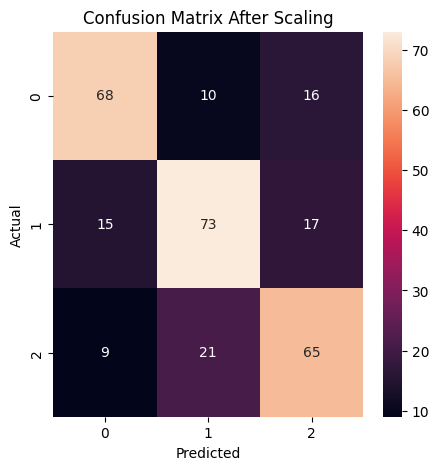

In [93]:
corr_after_scaling = confusion_matrix(y_true=y_test_after,y_pred=y_pred_after_scaling)
corr_after_scaling

#leats plot a confusion matrix
plt.figure(figsize=(5,5))
sns.heatmap(corr_after_scaling,annot=True)
plt.title("Confusion Matrix After Scaling")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

#### HyperParameter Tuning


In [94]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'max_depth': list(range(1, 25)),
    'min_samples_split': list(range(1, 11)),
    'min_samples_leaf': list(range(1, 11))
}
clf = GridSearchCV(DecisionTreeClassifier(), param_grid, n_jobs=-1).fit(X_train, y_train)



In [95]:
clf.best_params_

{'max_depth': 12, 'min_samples_leaf': 4, 'min_samples_split': 4}

In [96]:
#training with best set of hyperparameter
decision_tree_with_tunes_hp = DecisionTreeClassifier(**clf.best_params_).fit(X_train,y_train)

In [97]:

print("Training Accuracy after hyperparameter tuning:",decision_tree_with_tunes_hp.score(X_train,y_train))
print("Testing Accuracy after hyperparameter tuning: ", decision_tree_with_tunes_hp.score(X_test,y_test))

Training Accuracy after hyperparameter tuning: 0.855
Testing Accuracy after hyperparameter tuning:  0.7766666666666666


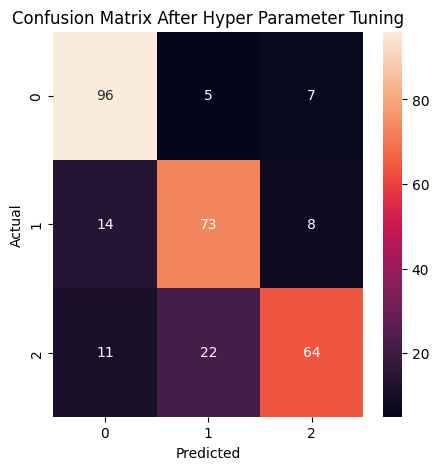

In [98]:
y_pred_after_hp_tuning= decision_tree_with_tunes_hp.predict(X_test)
corr_after_scaling = confusion_matrix(y_true=y_test,y_pred=y_pred_after_hp_tuning)
corr_after_scaling

#leats plot a confusion matrix
plt.figure(figsize=(5,5))
sns.heatmap(corr_after_scaling,annot=True)
plt.title("Confusion Matrix After Hyper Parameter Tuning")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [99]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(decision_tree_with_tunes_hp, X, Y, n_jobs=-1)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.74 (+/- 0.02)


### Practice another example

##### Read CSV

In [100]:
df= pd.read_csv("salaries.csv")

**Defining Dependent and Independent Variable**

In [101]:
input_features = df.drop('salary_more_then_100k',axis='columns')

In [102]:
target = df['salary_more_then_100k']

**Label Encoding for All Columns**

In [103]:
from sklearn.preprocessing import LabelEncoder

In [104]:
le_company = LabelEncoder()
le_job = LabelEncoder()
le_degree = LabelEncoder()

In [105]:
input_features['company_n'] = le_company.fit_transform(input_features['company'])
input_features['job_n'] = le_company.fit_transform(input_features['job'])
input_features['degree_n'] = le_company.fit_transform(input_features['degree'])

**Dropping All Unnessary Columns**

In [106]:
input_features_n = input_features.drop(['company','job','degree'], axis='columns')
input_features_n.head()

,company_n,job_n,degree_n
0,2,2,0
1,2,2,1
2,2,0,0
3,2,0,1
4,2,1,0


**In Company**

Google = 2


**In Jobs**

Sales Executive = 2

Computer Programmer = 1

Business Manager = 0

**In Degree**

Masters = 1

Bachelors = 0


**Importing Decision Tree Model**

In [107]:
model =DecisionTreeClassifier()

**Fitting the Model with the Data**

In [108]:
model.fit(input_features_n, target)

DecisionTreeClassifier()

**Predicting the Salary**

In [109]:
model.predict([[2,0,1]])

array([1], dtype=int64)

**Score of the Model**

In [110]:
model.score(input_features_n, target)

1.0